## Importing Libraries and Loading the Dataset

In [53]:
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

titanic_df = pd.read_csv('titanic.csv')

## Calculating Class-wise Statistics
###### Here, I calculate statistics for passenger age and fare grouped by class. This includes mean, median, min, max, and count for both age and fare, allowing us to compare characteristics across passenger classes.

In [56]:
class_stats = titanic_df.groupby('class').agg({
    'age': ['mean', 'median', 'min', 'max', 'count'],
    'fare': ['mean', 'median', 'min', 'max', 'count']
})

class_stats.columns = ['age_mean', 'age_median', 'age_min', 'age_max', 'age_count',
                       'fare_mean', 'fare_median', 'fare_min', 'fare_max', 'fare_count']

display(class_stats)

,age_mean,age_median,age_min,age_max,age_count,fare_mean,fare_median,fare_min,fare_max,fare_count
class,,,,,,,,,,
First,38.233441,37.0,0.92,80.0,186,84.154687,60.2875,0.0,512.3292,216
Second,29.877630,29.0,0.67,70.0,173,20.662183,14.2500,0.0,73.5000,184
Third,25.140620,24.0,0.42,74.0,355,13.675550,8.0500,0.0,69.5500,491


## Survival Rates by Class and Demographics

### Survival by Passenger `Class`
###### Here, I calculate the survival probabilities for each passenger class (First, Second, and Third). This helps highlight how passengers in higher classes had better chances of survival, with the survival rate being highest for first-class passengers and lowest for third-class passengers.

In [60]:
survival_by_class = titanic_df.groupby('class')['survived'].mean()

survival_by_class_df = survival_by_class.reset_index()
survival_by_class_df.columns = ['class', 'survival_probability']

display(survival_by_class_df)

,class,survival_probability
0,First,0.629630
1,Second,0.472826
2,Third,0.242363


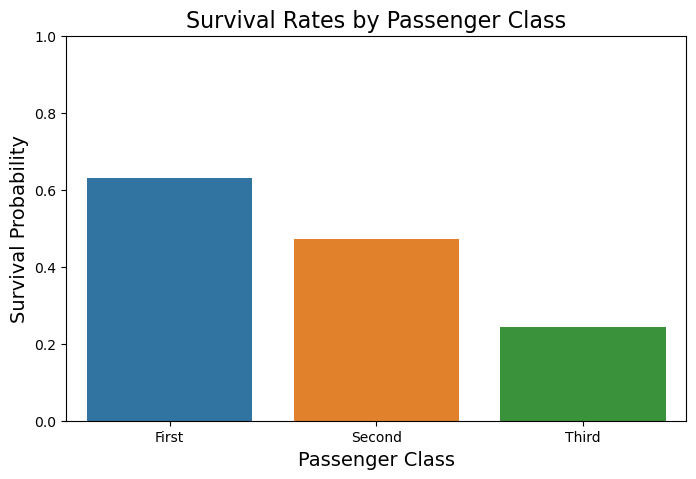

In [65]:
plt.figure(figsize=(8, 5))
sns.barplot(data=survival_by_class_df, x="class", y="survival_probability", hue="class", dodge=False)
plt.title("Survival Rates by Passenger Class", fontsize=16)
plt.xlabel("Passenger Class", fontsize=14)
plt.ylabel("Survival Probability", fontsize=14)
plt.ylim(0, 1)
plt.legend([], [], frameon=False)  
plt.show()

### Survival by Demographics `Who`
###### Next, I calculate survival probabilities based on the who category (e.g., men, women, children). This provides insights into how different demographic groups were affected in terms of survival.

In [68]:
survival_by_who = titanic_df.groupby('who')['survived'].mean()

survival_by_who_df = survival_by_who.reset_index()
survival_by_who_df.columns = ['who', 'survival_probability']

display(survival_by_who_df)

,who,survival_probability
0,child,0.590361
1,man,0.163873
2,woman,0.756458


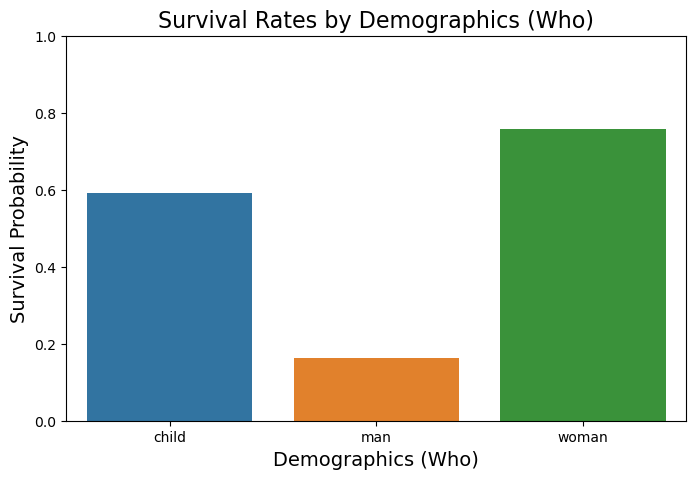

In [74]:
plt.figure(figsize=(8, 5))
sns.barplot(data=survival_by_who_df, x="who", y="survival_probability", hue="who", dodge=False)
plt.title("Survival Rates by Demographics (Who)", fontsize=16)
plt.xlabel("Demographics (Who)", fontsize=14)
plt.ylabel("Survival Probability", fontsize=14)
plt.ylim(0, 1)
plt.legend([], [], frameon=False)  
plt.show()

## Passenger and Survivor Counts by Embarkation Town and Deck
###### In this section, I grouped the data by embark_town and deck to calculate the number of passengers and survivors for each combination. This helps us understand how survival and passenger distribution varied across embarkation points and deck locations.

In [63]:
embark_deck_stats = titanic_df.groupby(['embark_town', 'deck']).agg({
    'survived': ['count', 'sum']
})

embark_deck_stats.columns = ['passenger_count', 'survivor_count']

embark_deck_stats_df = embark_deck_stats.reset_index()

display(embark_deck_stats_df)

,embark_town,deck,passenger_count,survivor_count
0,Cherbourg,A,7,4
1,Cherbourg,B,22,17
2,Cherbourg,C,21,14
3,Cherbourg,D,13,11
4,Cherbourg,E,5,5
5,Cherbourg,F,1,1
6,Queenstown,C,2,1
7,Queenstown,E,1,1
8,Queenstown,F,1,0
9,Southampton,A,8,3


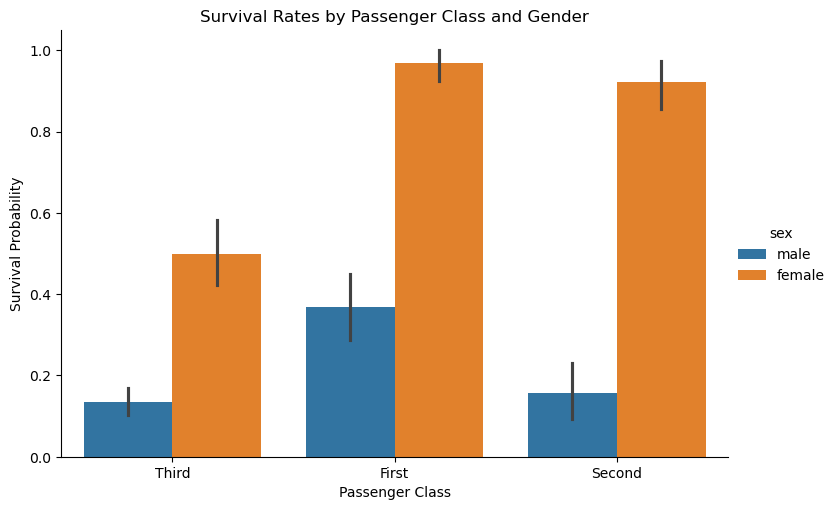

In [66]:
sns.catplot(data=titanic_df, kind="bar", x="class", y="survived", hue="sex", height=5, aspect=1.5)
plt.title("Survival Rates by Passenger Class and Gender")
plt.ylabel("Survival Probability")
plt.xlabel("Passenger Class")
plt.show()